# Analyze data distribution with CLUSTERING : K-means vs. Hierarchical Agglomerative Clustering (HAC) 

**Author: Pr Fabien MOUTARDE, Center for Robotics, MINES ParisTech, PSL Université Paris**

### Imports


In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

### Loading toy datasets from files

In [2]:
# Get data
def get_data(data_path):
    data = []
    with open(data_path, 'r') as file:
        for num, line in enumerate(file):
            if num >= 4:
                line_sep = line.strip('\n').split(sep='\t')
                single_example = [float(element) for element in line_sep][1:]
                data.append(single_example)

    return np.array(data)

In [3]:
data_atom = get_data('./clustering-examples/Atom.lrn')
data_lsun = get_data('./clustering-examples/Lsun.lrn')
data_wingnut = get_data('./clustering-examples/WingNut.lrn')
data_chainlink = get_data('./clustering-examples/Chainlink.lrn')
data_twodiamonds = get_data('./clustering-examples/TwoDiamonds.lrn')

### Visualizing datasets

In [4]:
def data_show(data):
    num_dim = data.shape[1]
        
    # Show
    fig = plt.figure()
    if num_dim == 2:
        plt.scatter(data[:, 0], data[:, 1])
    else:
        ax = plt.axes(projection='3d')
        ax.scatter3D(data[:, 0], data[:, 1], data[:, 2])
    plt.show()

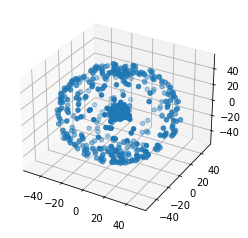

In [5]:
data_show(data_atom)

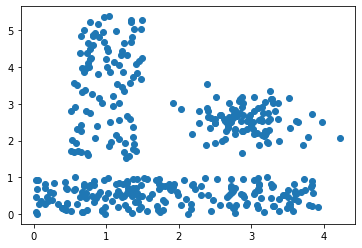

In [6]:
data_show(data_lsun)

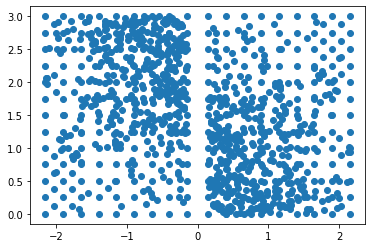

In [7]:
data_show(data_wingnut)

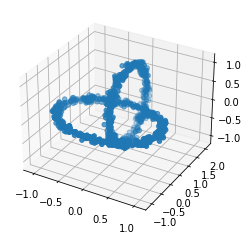

In [8]:
data_show(data_chainlink)

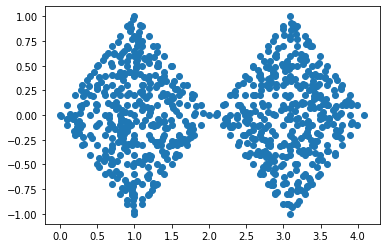

In [9]:
data_show(data_twodiamonds)

## 1. K-means

**Test the K-means clustering method, implemented in SciKit-Learn by the class sklearn.cluster.KMeans.**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

**Then experiment K-means on each of the 5 datasets, and with several values for K**

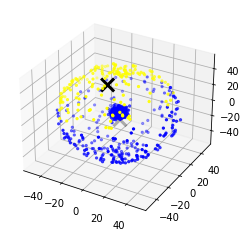

In [10]:
data = data_atom
kmeans = KMeans(n_clusters=2, random_state=0, n_init=20)
kmeans.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max), np.arange(z_min, z_max))
Z = kmeans.predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
# cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
ax.scatter3D(data[cluster0, 0], data[cluster0, 1], data[cluster0, 2], 'w',
             color='yellow', marker='.')
ax.scatter3D(data[cluster1, 0], data[cluster1, 1], data[cluster1, 2], 'w',
             color='blue', marker='.')
plt.show()


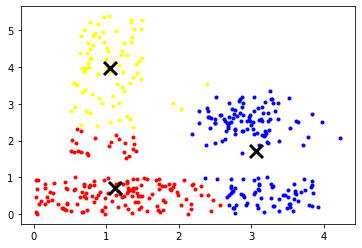

In [11]:
data = data_lsun
kmeans = KMeans(n_clusters=3, random_state=0, n_init=20)
kmeans.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = kmeans.predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
plt.scatter(data[cluster2, 0], data[cluster2, 1], 
             c='red', marker='.')
plt.show()

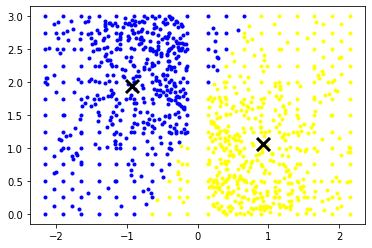

In [12]:
data = data_wingnut
kmeans = KMeans(n_clusters=2, random_state=0, n_init=20)
kmeans.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = kmeans.predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
#cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
#plt.scatter(data[cluster2, 0], data[cluster2, 1], 
#             c='red', marker='.')
plt.show()

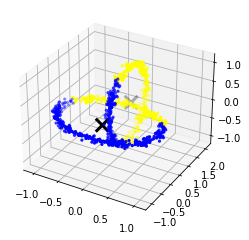

In [13]:
data = data_chainlink
kmeans = KMeans(n_clusters=2, random_state=0, n_init=20)
kmeans.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max), np.arange(z_min, z_max))
Z = kmeans.predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
# cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
ax.scatter3D(data[cluster0, 0], data[cluster0, 1], data[cluster0, 2], 'w',
             color='yellow', marker='.')
ax.scatter3D(data[cluster1, 0], data[cluster1, 1], data[cluster1, 2], 'w',
             color='blue', marker='.')
plt.show()


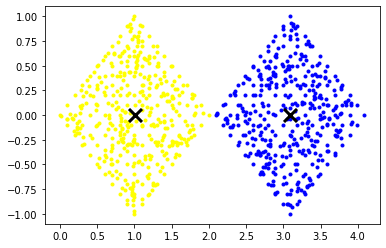

In [14]:
data = data_twodiamonds
kmeans = KMeans(n_clusters=2, random_state=0, n_init=20)
kmeans.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = kmeans.predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
#cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
#plt.scatter(data[cluster2, 0], data[cluster2, 1], 
#             c='red', marker='.')
plt.show()

#### QUESTION 1: Does the K-means algo always produce the expected result?


No, the K-means method produces only one time the expected result.

#### QUESTION 2: What is the only shape of cluster that K-means is capable of isolating?

The only shape that K-means works is the shape of two diamonds.

## 2. Agglomerative Clustering

**Now, test the Hierarchical Agglomerative Clustering, implemented in SciKit-Learn by the class sklearn.cluster.AgglomerativeClustering**
**First read in detail its documentation:**
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

**Then experiment Agglomerative Clustering on each of the 5 datasets, with either single-linkage or complete-linkage, and with several values for the requested number of clusters**

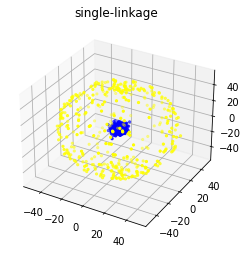

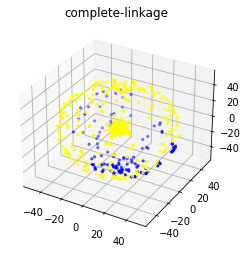

In [15]:
data = data_atom
hac = AgglomerativeClustering(n_clusters=2, linkage="single")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max), np.arange(z_min, z_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
# cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_

ax.scatter3D(data[cluster0, 0], data[cluster0, 1], data[cluster0, 2], 'w',
             color='yellow', marker='.')
ax.scatter3D(data[cluster1, 0], data[cluster1, 1], data[cluster1, 2], 'w',
             color='blue', marker='.')
ax.set_title("single-linkage")
plt.show()
print("\n")



hac = AgglomerativeClustering(n_clusters=2, linkage="complete")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max), np.arange(z_min, z_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
# cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_

ax.scatter3D(data[cluster0, 0], data[cluster0, 1], data[cluster0, 2], 'w',
             color='yellow', marker='.')
ax.scatter3D(data[cluster1, 0], data[cluster1, 1], data[cluster1, 2], 'w',
             color='blue', marker='.')
ax.set_title("complete-linkage")
plt.show()

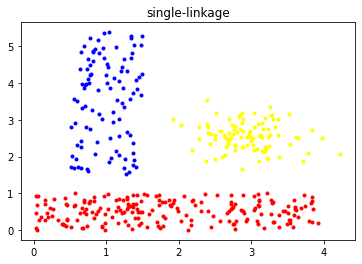

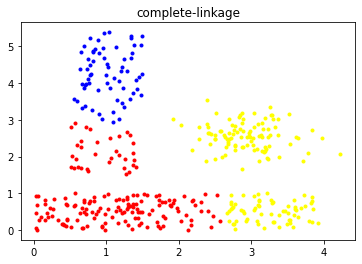

In [16]:
data = data_lsun
hac = AgglomerativeClustering(n_clusters=3, linkage="single")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
cluster2 = (Z == 2)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
plt.scatter(data[cluster2, 0], data[cluster2, 1], 
             c='red', marker='.')
plt.title("single-linkage")
plt.show()


hac = AgglomerativeClustering(n_clusters=3, linkage="complete")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
cluster2 = (Z == 2)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
plt.scatter(data[cluster2, 0], data[cluster2, 1], 
             c='red', marker='.')
plt.title("complete-linkage")
plt.show()

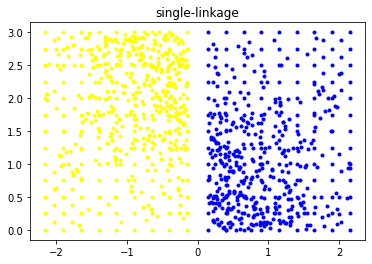

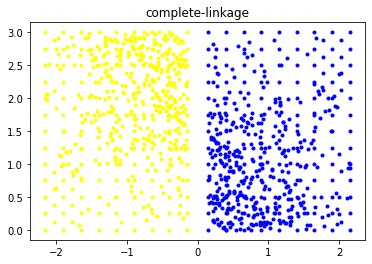

In [17]:
data = data_wingnut
hac = AgglomerativeClustering(n_clusters=2, linkage="single")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
cluster2 = (Z == 2)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
plt.scatter(data[cluster2, 0], data[cluster2, 1], 
             c='red', marker='.')
plt.title("single-linkage")
plt.show()


hac = AgglomerativeClustering(n_clusters=2, linkage="complete")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
cluster2 = (Z == 2)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
plt.scatter(data[cluster2, 0], data[cluster2, 1], 
             c='red', marker='.')
plt.title("complete-linkage")
plt.show()

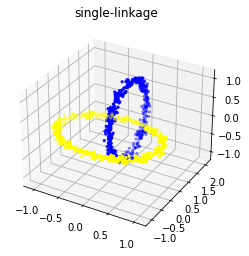

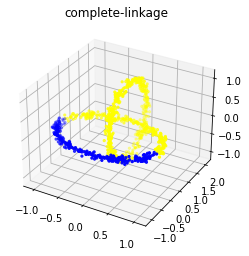

In [18]:
data = data_chainlink
hac = AgglomerativeClustering(n_clusters=2, linkage="single")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max), np.arange(z_min, z_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
# cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_

ax.scatter3D(data[cluster0, 0], data[cluster0, 1], data[cluster0, 2], 'w',
             color='yellow', marker='.')
ax.scatter3D(data[cluster1, 0], data[cluster1, 1], data[cluster1, 2], 'w',
             color='blue', marker='.')
ax.set_title("single-linkage")
plt.show()


hac = AgglomerativeClustering(n_clusters=2, linkage="complete")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max), np.arange(z_min, z_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
# cluster2 = (Z == 2)
centroids = kmeans.cluster_centers_

ax.scatter3D(data[cluster0, 0], data[cluster0, 1], data[cluster0, 2], 'w',
             color='yellow', marker='.')
ax.scatter3D(data[cluster1, 0], data[cluster1, 1], data[cluster1, 2], 'w',
             color='blue', marker='.')
ax.set_title("complete-linkage")
plt.show()

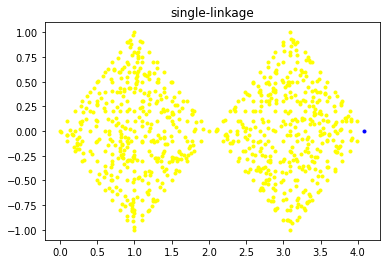

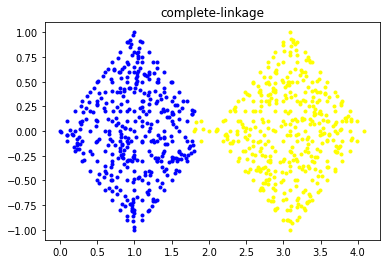

In [19]:
data = data_twodiamonds
hac = AgglomerativeClustering(n_clusters=2, linkage="single")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
cluster2 = (Z == 2)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
plt.scatter(data[cluster2, 0], data[cluster2, 1], 
             c='red', marker='.')
plt.title("single-linkage")
plt.show()


hac = AgglomerativeClustering(n_clusters=2, linkage="complete")
hac.fit(data)
n_samples, n_features = data.shape
fig = plt.figure()
#ax = plt.axes(projection='3d')
#ax.scatter3D(data_atom[:, 0], data_atom[:, 1], data_atom[:, 2])
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
#z_min, z_max = data[:, 2].min() - 1, data[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max), np.arange(y_min, y_max))
Z = hac.fit_predict(data)
cluster0 = (Z == 0)
cluster1 = (Z == 1)
cluster2 = (Z == 2)
plt.scatter(data[cluster0, 0], data[cluster0, 1],
             marker='.', c='yellow')
plt.scatter(data[cluster1, 0], data[cluster1, 1],
             c='blue', marker='.')
plt.scatter(data[cluster2, 0], data[cluster2, 1], 
             c='red', marker='.')
plt.title("complete-linkage")
plt.show()

#### QUESTION 3: On which dataset does "single-linkage" HAC produce an excellent result? Why is it logical?


HAC producecs an excellent result on *atom*, *lsun*, *chainlink* and *wingnut*.
It is logical because whenusing *single-linkage*, this algorithme find every time the closest points pairs and merge them into one cluster. And in these datasets, the distance between different clusters is large enough.

#### QUESTION 4: Conversely, on which dataset does "single-linkage" HAC perform very BADLY, and why is it expected?


This method performs badly on *twodiamonds*, that's because the closet points pair in the two clusters is closer than one pair inside the right diamond. 

#### QUESTION 5: By comparing with what you had observed for K-means, which variant of HAC (between single-linkage and complete-linkage) seems to be the most complementary to K-means?


Single-linkage HAC is most compplementary to K-means, beacause it performs well except on the *twodiamonds* while the K-means method performs only well on this dataset

### To learn more about OTHER clustering methods (such as Spectral Clustering) implemented in SciKit-Learn, you can look at the following page: https://scikit-learn.org/stable/modules/clustering.html

## 3. Now experiment clustering on a more realistics dataset: the Digits Dataset https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

(1797, 64) 
 (1797,)
(1797, 10)


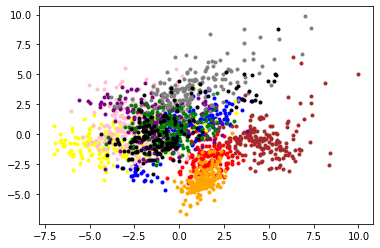

In [20]:
#Load the digits dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
Xdigits, ydigits = datasets.load_digits(return_X_y=True)
Xdigits = scale(Xdigits)
print(np.shape(Xdigits), '\n', np.shape(ydigits))

reduced_data = PCA(n_components=10).fit_transform(Xdigits)
print(np.shape(reduced_data))
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1

plt.figure()
colors = ["red", "blue", "yellow", "pink", "brown", "purple", "orange", "grey", "green", "black"]
for i in range(10):
    indexi = (ydigits == i)
    plt.scatter(reduced_data[indexi, 0], reduced_data[indexi, 1],
                marker='.', c=colors[i])
    
plt.show()

### The goal is to check if the 10 classes correspond or not to separate clusters in input space
**Therefore, you should perform clustering, with 10 or more clusters (as one class could correspond to more than one cluster), on the dataset WITHOUT USING LABELS**
**Then, you should analyze the distribution of labels of examples in each of the obtained clusters, in order to measure how homogeneous in terms of labels is each cluster, and check if it is possible to obtain a one-to-one (or one-to-few) correspondance between classes and clusters.**

(10, 10)


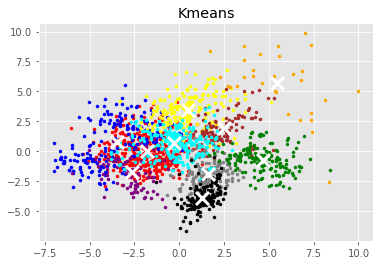

In [21]:
# Kmeans
data = reduced_data
kmeans = KMeans(n_clusters=10, random_state=0, n_init=20)
kmeans.fit(data)
fig = plt.figure()
styles = plt.style.available
plt.style.use("ggplot")
Z = kmeans.predict(data)
centroids = kmeans.cluster_centers_
print(np.shape(centroids))
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
colors = ["red", "blue", "yellow", "grey", "brown", "purple", "orange", "cyan", "green", "black"]
for i in range(10):
    indexi = (Z == i)
    plt.scatter(reduced_data[indexi, 0], reduced_data[indexi, 1],
                marker='.', c=colors[i])
plt.title("Kmeans")
plt.show()

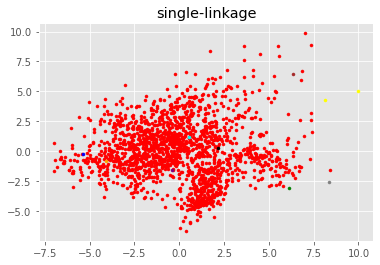

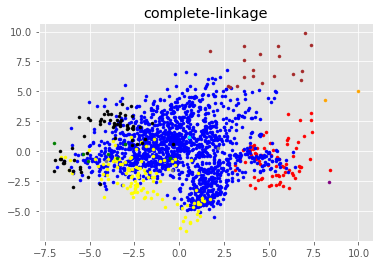

In [22]:
#HAC
data = reduced_data

hac = AgglomerativeClustering(n_clusters=10, linkage="single")
hac.fit(data)
fig = plt.figure()
styles = plt.style.available
plt.style.use("ggplot")
Z = hac.fit_predict(data)
colors = ["red", "blue", "yellow", "grey", "brown", "purple", "orange", "cyan", "green", "black"]
for i in range(10):
    indexi = (Z == i)
    plt.scatter(reduced_data[indexi, 0], reduced_data[indexi, 1],
                marker='.', c=colors[i])
plt.title("single-linkage")
plt.show()

hac = AgglomerativeClustering(n_clusters=10, linkage="complete")
hac.fit(data)
fig = plt.figure()
styles = plt.style.available
plt.style.use("ggplot")
Z = hac.fit_predict(data)
colors = ["red", "blue", "yellow", "grey", "brown", "purple", "orange", "cyan", "green", "black"]
for i in range(10):
    indexi = (Z == i)
    plt.scatter(reduced_data[indexi, 0], reduced_data[indexi, 1],
                marker='.', c=colors[i])
plt.title("complete-linkage")
plt.show()